In [11]:
import cv2
import numpy as np
from IPython.display import Image, display
from matplotlib import pyplot as plt


#### opencvのハフ変換関数：

##### lines = cv2.HoughLines(image, rho, theta, threshold[, lines[, srn[, stn[, min_theta[, max_theta]]]]])

- image	ndarray	r 入力画像 (1チャンネル)
- rho	float	 投票の rho の解像度ピクセルセル)
- theta	float  投票の theta の解像角の度数クセル)
- threshold	int　直線と判断す (最大は対角線の長さ）る投票数


In [12]:
def imshow(img):
    """ndarray 配列をインラインで Notebook 上に表示する。
    """
    ret, encoded = cv2.imencode(".jpg", img)
    display(Image(encoded))

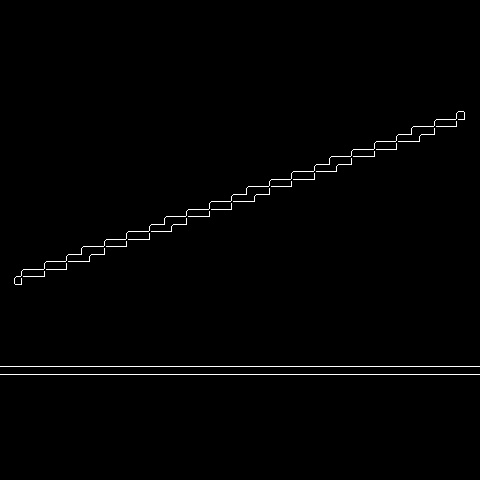

In [2]:

# 画像を読み込む。
img = cv2.imread("imgs/lines.bmp")

# グレースケールに変換する。
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Canny 法で2値化する。
edges = cv2.Canny(gray, 150, 300, L2gradient=True)
imshow(edges)

In [3]:
# ハフ変換で直線検出する。
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
print(lines)

[[[366.          1.5707964]]

 [[374.          1.5707964]]]


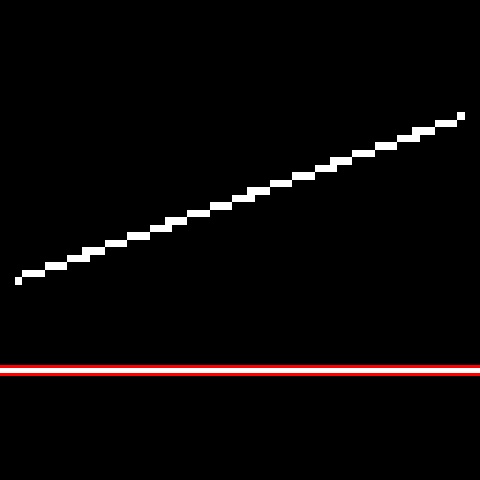

In [4]:
def draw_line(img, theta, rho):
    h, w = img.shape[:2]
    if np.isclose(np.sin(theta), 0):
        x1, y1 = rho, 0
        x2, y2 = rho, h
    else:
        calc_y = lambda x: rho / np.sin(theta) - x * np.cos(theta) / np.sin(theta)
        x1, y1 = 0, calc_y(0)
        x2, y2 = w, calc_y(w)

    # float -> int
    x1, y1, x2, y2 = list(map(int, [x1, y1, x2, y2]))

    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


# 直線を描画する。
if lines is not None:
    for rho, theta in lines.squeeze(axis=1):
        draw_line(img, theta, rho)
imshow(img)

In [10]:
from IPython.display import Image, display
from ipywidgets import widgets
import math

def houghline(img, rho, theta, threshold, theta_range):
    """ハフ変換で直線検出を行い、結果を表示する。
    """
    # グレースケールに変換する。
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Canny 法で2値化する。
    edges = cv2.Canny(gray, 150, 300, L2gradient=True)
    # ハフ変換で直線検出する。
    lines = cv2.HoughLines(
        edges,
        rho,
        np.radians(theta),
        threshold,
        min_theta=np.radians(theta_range[0]),
        max_theta=np.radians(theta_range[1]),
    )
    # 検出した直線を描画する。
    dst = img.copy()

    if lines is not None:
        for rho, theta in lines.squeeze(axis=1):
            draw_line(dst, theta, rho)
    imshow(dst)

# 画像を読み込む。
img = cv2.imread("imgs/lines.bmp")
w,h = img.shape[:2]
diag = int(math.sqrt(w*w+h*w))

# パラメータ「rho」を設定するスライダー
rho_slider = widgets.IntSlider(min=1, max=10, step=1, value=1, description="rho: ")
rho_slider.layout.width = "400px"

# パラメータ「theta」を設定するスライダー
theta_slider = widgets.IntSlider(min=1, max=180, step=1, value=1, description="theta: ")
theta_slider.layout.width = "400px"

# パラメータ「threshold」を設定するスライダー
threshold_slider = widgets.IntSlider(
    min=0, max=diag, step=1, value=100, description="threshold: "
)
threshold_slider.layout.width = "400px"

# パラメータ「min_theta」「max_theta」を設定するスライダー
theta_range_slider = widgets.IntRangeSlider(
    value=(0, 180), min=0, max=180, step=1, description="theta range: "
)
theta_range_slider.layout.width = "400px"


# ウィジェットを表示する。
widgets.interactive(
    houghline,
    img=widgets.fixed(img),
    rho=rho_slider,
    theta=theta_slider,
    threshold=threshold_slider,
    theta_range=theta_range_slider,
)

interactive(children=(IntSlider(value=1, description='rho: ', layout=Layout(width='400px'), max=10, min=1), In…